In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import davies_bouldin_score
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
import warnings
from warnings import filterwarnings
filterwarnings("ignore")

In [3]:
data_customers = pd.read_csv(r'C:\Users\vinay\Ecommerce-transactions\Customers.csv')
data_transactions = pd.read_csv(r'C:\Users\vinay\Ecommerce-transactions\Transactions.csv')

In [4]:
transaction_features = data_transactions.groupby('CustomerID').agg({
    'TotalValue': 'sum',  
    'Quantity': 'sum', 
    'TransactionID': 'count' 
}).rename(columns={
    'TotalValue': 'TotalSpending',
    'Quantity': 'TotalQuantity',
    'TransactionID': 'TotalTransactions'
}).reset_index()

customer_profiles = data_customers.merge(transaction_features, on='CustomerID', how='left')
customer_profiles.fillna(0, inplace=True)
customer_profiles = pd.get_dummies(customer_profiles, columns=['Region'], drop_first=True)

features = customer_profiles.drop(columns=['CustomerID', 'CustomerName', 'SignupDate'])

In [5]:
scaler = StandardScaler()
features_scaled = scaler.fit_transform(features)

db_indices = []
cluster_results = {}
for n_clusters in range(2, 11):
    kmeans = KMeans(n_clusters=n_clusters, random_state=42, n_init=10)
    labels = kmeans.fit_predict(features_scaled)
    db_index = davies_bouldin_score(features_scaled, labels)
    db_indices.append(db_index)
    cluster_results[n_clusters] = labels

optimal_clusters = min(db_indices, key=lambda x: db_indices.index(x))
best_labels = cluster_results[db_indices.index(optimal_clusters) + 2]

Optimal number of clusters: 2
Davies-Bouldin Index for optimal clusters: 1.48


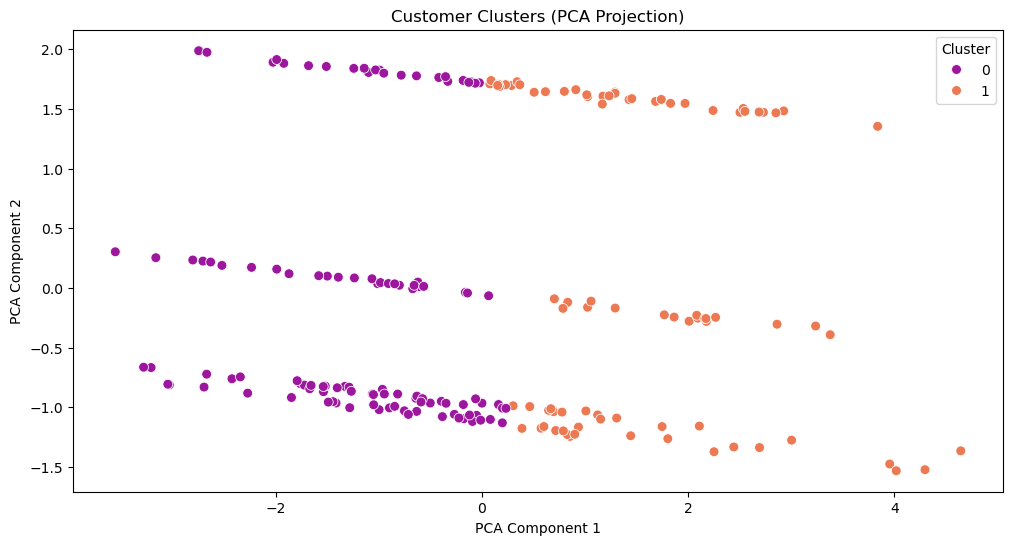

In [13]:
customer_profiles['Cluster'] = best_labels
print(f"Optimal number of clusters: {db_indices.index(optimal_clusters) + 2}")
print(f"Davies-Bouldin Index for optimal clusters: {optimal_clusters:.2f}")

pca = PCA(n_components=2)
features_pca = pca.fit_transform(features_scaled)

plt.figure(figsize=(12, 6))
sns.scatterplot(x=features_pca[:, 0], y=features_pca[:, 1], hue=customer_profiles['Cluster'], palette='plasma', s=50)
plt.title('Customer Clusters (PCA Projection)')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.legend(title='Cluster')
plt.show()

In [7]:
customer_profiles.to_csv('Customer_Clusters.csv', index=False)
print("Clustering results saved to 'Customer_Clusters.csv'")

Clustering results saved to 'Customer_Clusters.csv'
